In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.rename(columns={'cut': 'cut_quality', 'x': 'length_mm',
                   'y': 'width_mm', 'z': 'height_mm'}, inplace=True)

In [4]:
df.shape

(53940, 10)

# EDA

In [5]:
df.describe()

,carat,depth,table,price,length_mm,width_mm,height_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        53940 non-null  float64
 1   cut_quality  53940 non-null  object 
 2   color        53940 non-null  object 
 3   clarity      53940 non-null  object 
 4   depth        53940 non-null  float64
 5   table        53940 non-null  float64
 6   price        53940 non-null  int64  
 7   length_mm    53940 non-null  float64
 8   width_mm     53940 non-null  float64
 9   height_mm    53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.isnull().sum()

carat          0
cut_quality    0
color          0
clarity        0
depth          0
table          0
price          0
length_mm      0
width_mm       0
height_mm      0
dtype: int64

In [8]:
df.duplicated().sum()

146

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(53794, 10)

## Univariate Analysis

In [11]:
num_features = df.select_dtypes(include=['int64','float64'])
print(num_features.columns)

Index(['carat', 'depth', 'table', 'price', 'length_mm', 'width_mm',
       'height_mm'],
      dtype='object')


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'length_mm'}>,
        <AxesSubplot:title={'center':'width_mm'}>],
       [<AxesSubplot:title={'center':'height_mm'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

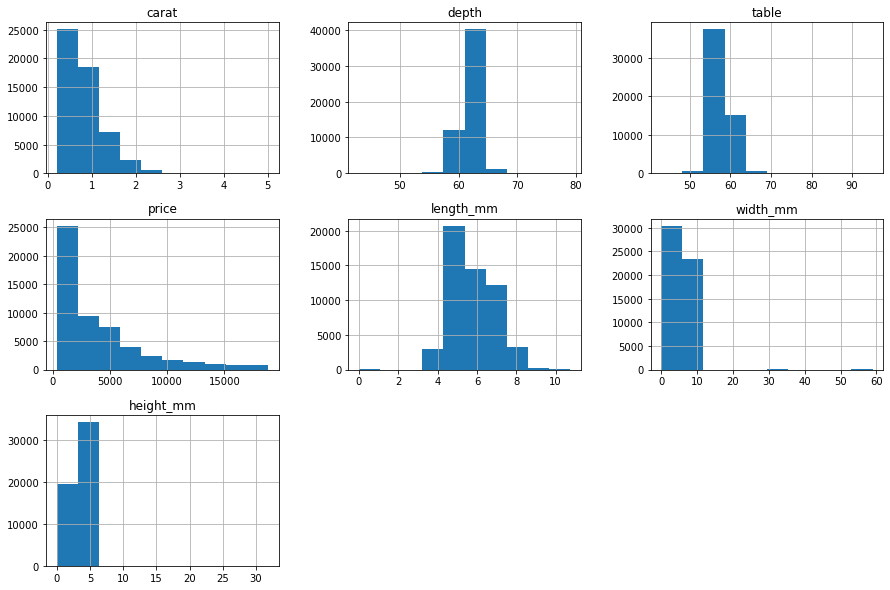

In [12]:
num_features.hist(figsize=(15,10))

> Observation

- The price feature is right skewed.
- The depth feature is very close to a normal distribution.
- Since the price is right skewed, the predictive model will be more effective in predicting the lower prices.

In [13]:
cat_features = df.select_dtypes(include=['object'])
print(cat_features.columns)

Index(['cut_quality', 'color', 'clarity'], dtype='object')


Text(0.5, 1.0, 'Color vs cut_quality')

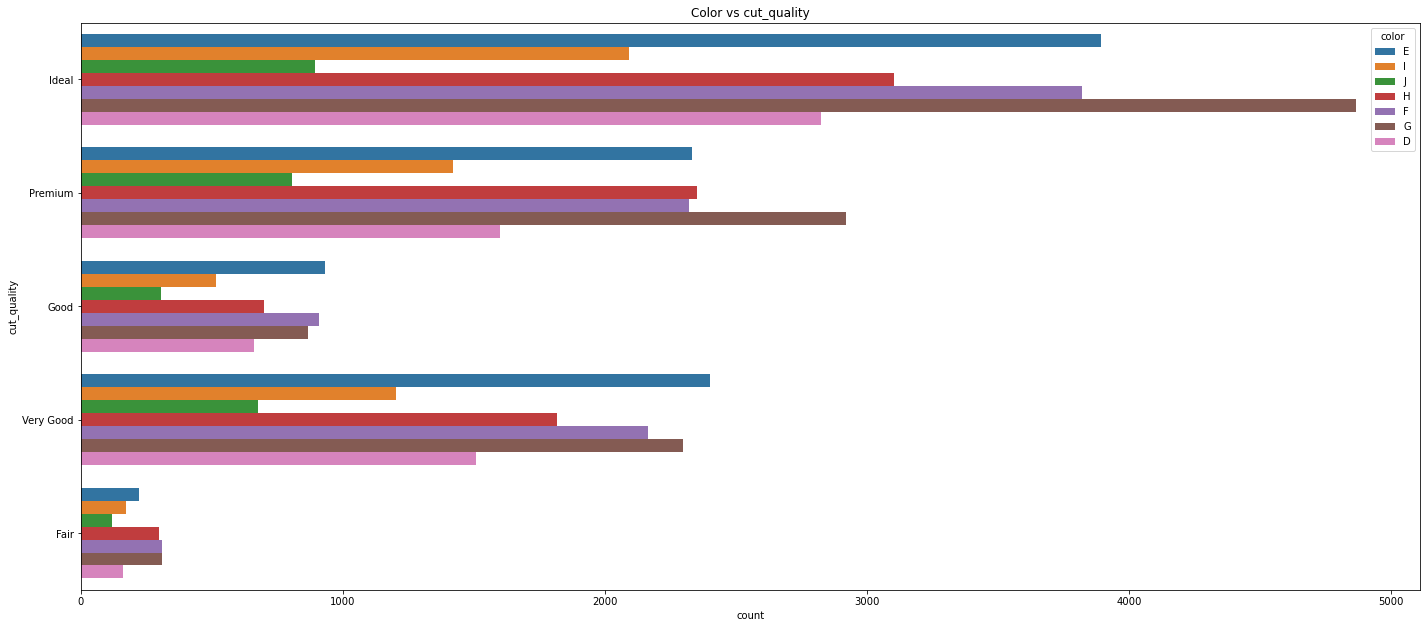

In [14]:
plt.figure(figsize=(24, 48))

plt.subplot(411)
sns.countplot(y='cut_quality', hue='color', data = cat_features)
plt.title('Color vs cut_quality')

> Observation: Cut quality of every colour diamond is mostly Ideal.

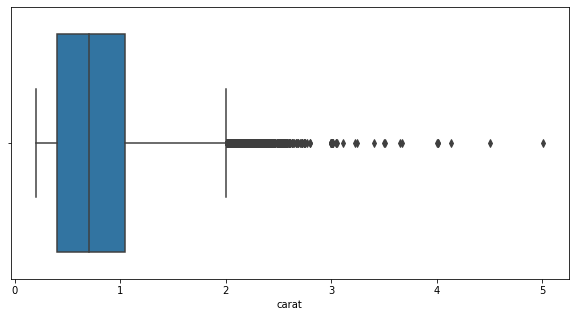

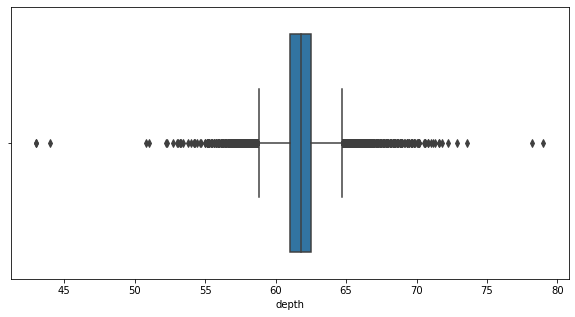

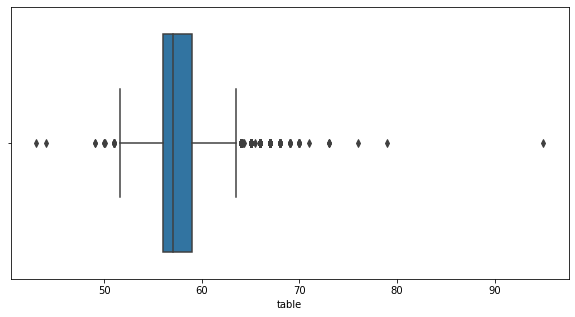

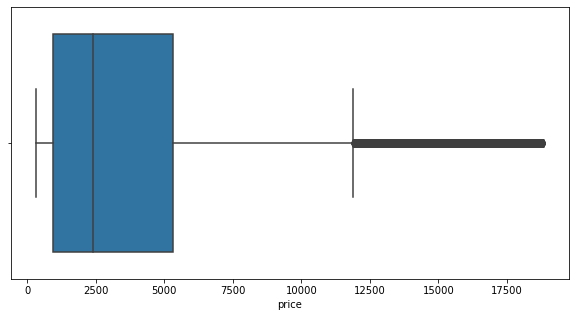

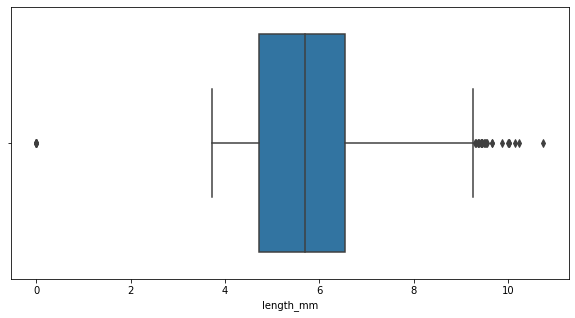

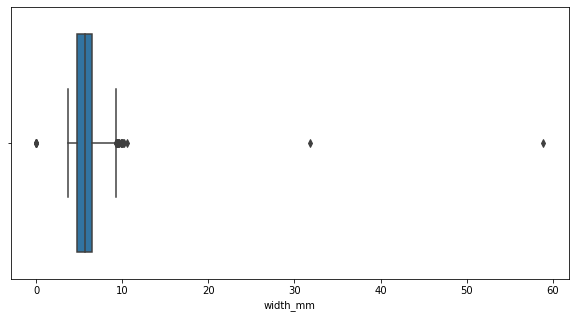

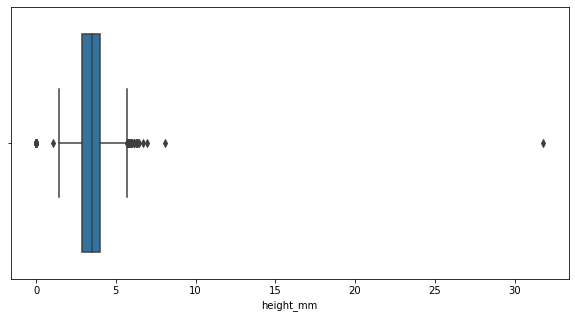

In [15]:
for num_var in num_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[num_var])

> Observation : There are many outliers in the dataset.

## Bivariate Analysis

<AxesSubplot:>

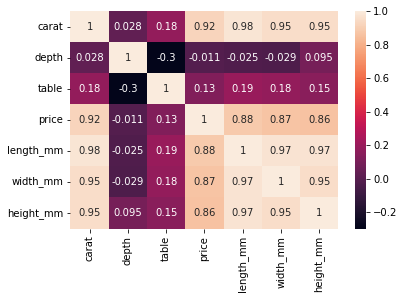

In [16]:
corr=df.corr()
sns.heatmap(corr,annot=True)

> Observation: The price is highly influenced by carat, length, width and height features.

# Data Preprocessing

In [17]:
num_df = df.select_dtypes(exclude=[np.object])
cat_df = df.select_dtypes(exclude=[np.float64, np.int64])

C:\Users\smart\AppData\Local\Temp\ipykernel_1572\3673224885.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_df = df.select_dtypes(exclude=[np.object])


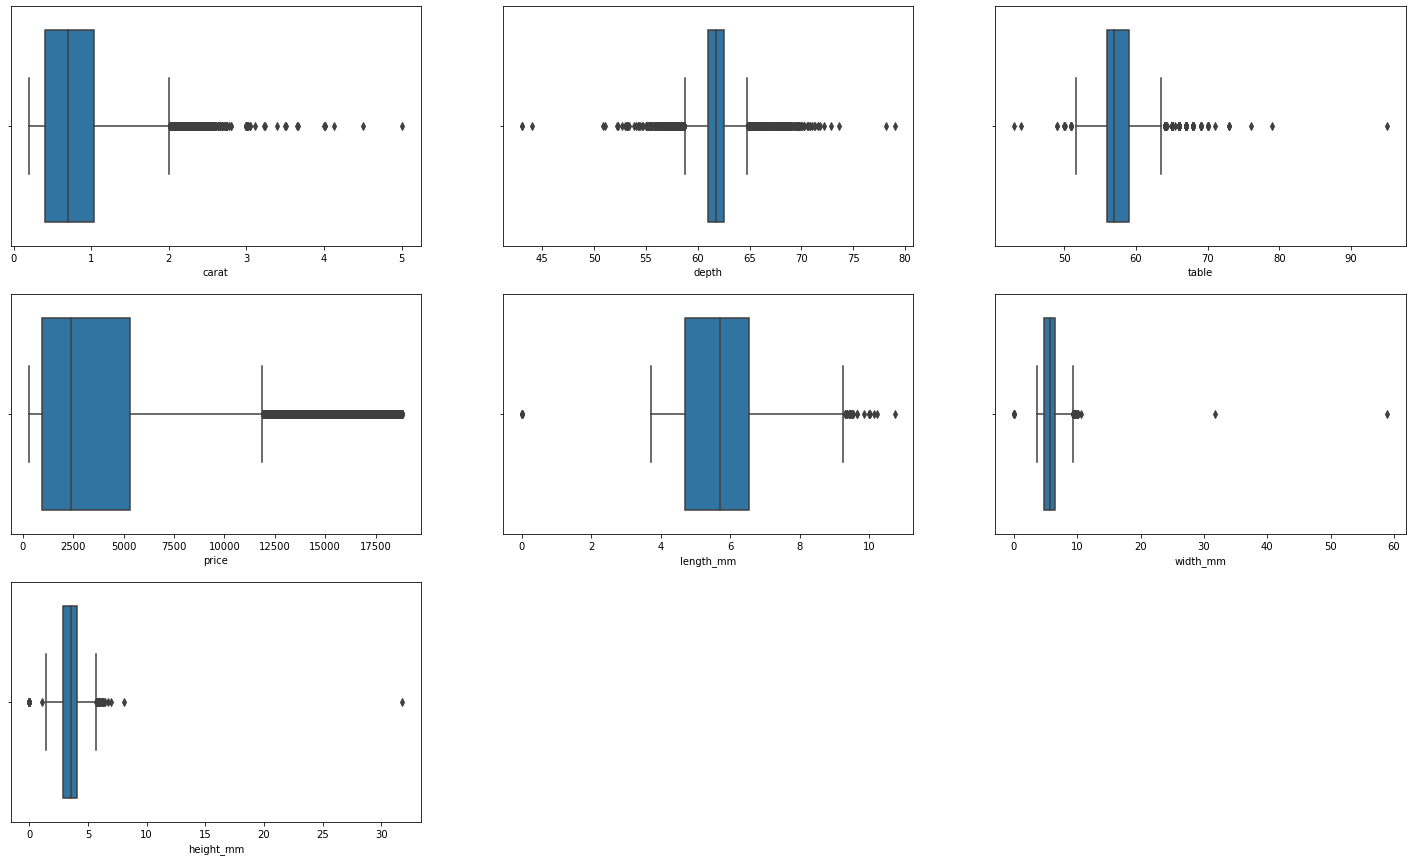

In [18]:
plt.subplots(figsize=(25, 15))
count = 1
while(count < 8):
    for i in num_df.columns:
        plt.subplot(3, 3, count)
        sns.boxplot(x=df[i])
        count += 1
plt.show()

In [19]:
# IQR
def remove_outlier_IQR(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) -
                 np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (
        iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(
        df[field_name], 25) - iqr)].index, inplace=True)
    return df

In [20]:
print('Shape of df before IQR:',df.shape)

df2 = remove_outlier_IQR(df, 'carat')
df2 = remove_outlier_IQR(df2, 'depth')
df2 = remove_outlier_IQR(df2, 'price')
df2 = remove_outlier_IQR(df2, 'table')
df2 = remove_outlier_IQR(df2, 'height_mm')
df2 = remove_outlier_IQR(df2, 'length_mm')
df_final = remove_outlier_IQR(df2, 'width_mm')
print('Shape of df after IQR:',df_final.shape)

Shape of df before IQR: (53794, 10)
Shape of df after IQR: (46413, 10)


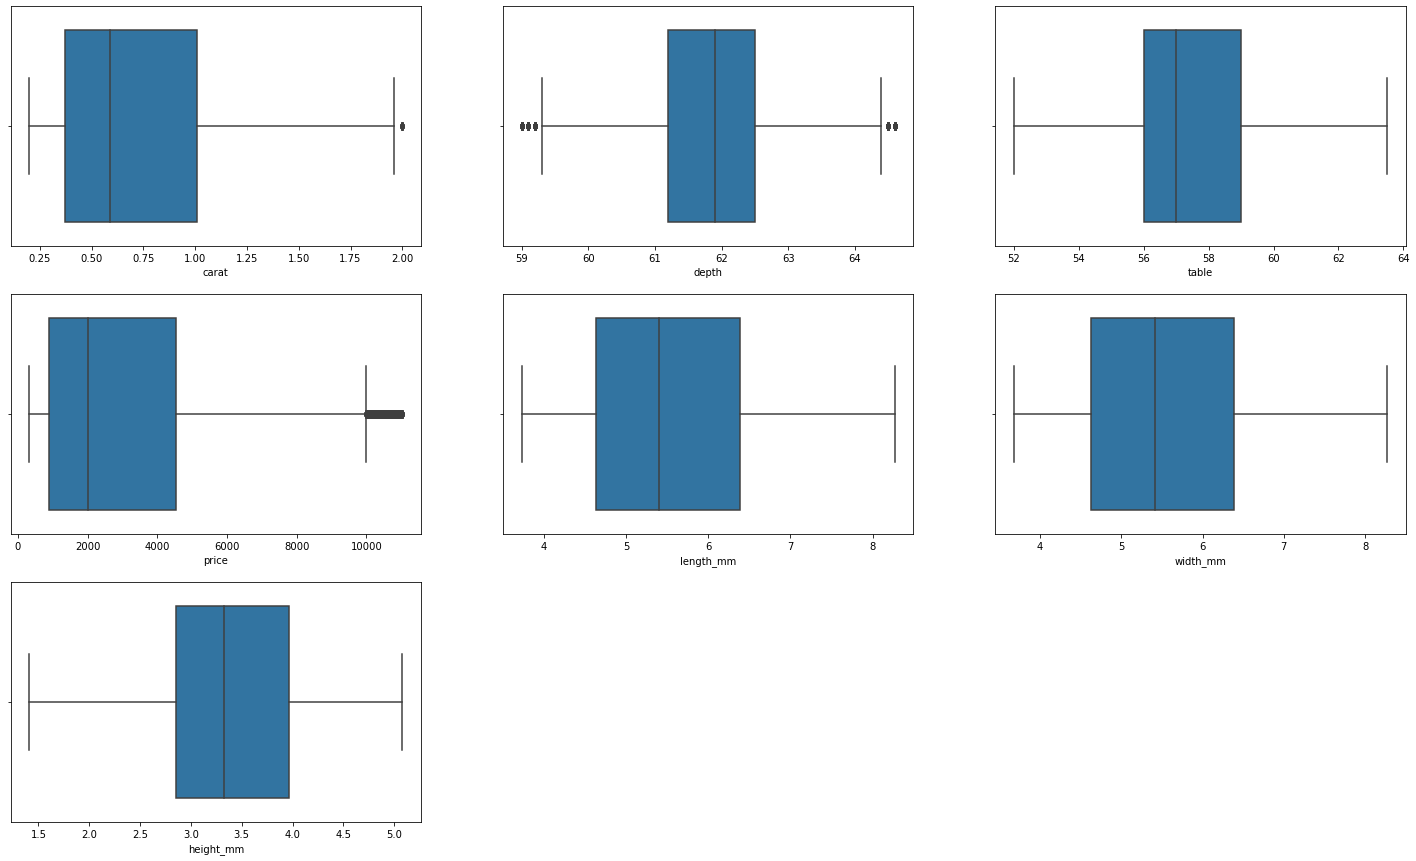

In [21]:
plt.subplots(figsize=(25, 15))
count = 1
while(count < 8):
    for i in num_df.columns:
        plt.subplot(3, 3, count)
        sns.boxplot(x=df_final[i])
        count += 1
plt.show()

# Feature Transformation

In [22]:
df. dtypes[df. dtypes == 'object']

cut_quality    object
color          object
clarity        object
dtype: object

In [23]:
print(df['cut_quality'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS2' 'VVS2' 'VVS1' 'VS1' 'I1' 'IF']


In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [25]:
df['cut_quality']= label_encoder.fit_transform(df['cut_quality'])
df['color']= label_encoder.fit_transform(df['color'])
df['clarity']= label_encoder.fit_transform(df['clarity'])
  
print(df['cut_quality'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

[2 3 1 4 0]
[1 5 6 4 2 3 0]
[3 2 5 7 6 4 0 1]


# Data Splitting for training and testing

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
y = df['price']

# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_df, y, test_size=0.25)
print("X train shape: {} and y train shape: {}".format(
    X_train.shape, y_train.shape))
print("X test shape: {} and y test shape: {}".format(X_test.shape, y_test.shape))

X train shape: (34809, 9) and y train shape: (34809,)
X test shape: (11604, 9) and y test shape: (11604,)


# Model Training and Evaluation

## KNN from scratch

In [27]:
train = np.array(X_train)
y_train = np.array(y_train)

# reshaping the array from columns to rows
y_train = y_train.reshape(-1, 1)

# combining the training dataset and the y_train into a matrix
train_df = np.hstack([train, y_train])
train_df[0:2]

array([[ 5.57516699e-03, -6.61823601e-01,  2.75863001e-01,
        -1.66908679e+00, -1.48807787e+00, -1.19098450e-01,
         2.68083711e-01,  3.27031634e-01,  1.44089896e-01,
         3.67200000e+03],
       [-4.92093821e-01, -6.61823601e-01, -9.10976958e-01,
        -1.09090339e+00, -7.45744303e-01, -1.19098450e-01,
        -3.12895839e-01, -3.40969003e-01, -3.92040824e-01,
         1.68200000e+03]])

In [28]:
test = np.array(X_test)
test[0]

array([-0.5197421 ,  0.39834133,  0.275863  ,  0.64364683,  0.73892283,
       -0.11909845, -0.38551828, -0.4453441 , -0.34177857])

In [29]:
preds = []
for i in range(len(test)):
    distances = np.sqrt(np.sum((train - test[i])**2, axis = 1))
    distances = distances.reshape(-1,1)
    matrix = np.hstack([train_df, distances])
    sorted_matrix = matrix[matrix[:,-1].argsort()]
    neighbours = [sorted_matrix[i][-2] for i in range(5)]
    pred_value = np.mean(neighbours)
    preds.append(pred_value)

knn_scratch_pred = np.array(preds)
knn_scratch_pred

array([1625. , 3859.4, 2571.4, ..., 6547.2, 2446.8, 1765.4])

## Using sklearn

In [30]:
# Finding the optimal k value
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse_val = []  
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)

    model.fit(X_train, y_train)  
    pred = model.predict(X_test)  
    error = sqrt(mean_squared_error(y_test, pred))  
    rmse_val.append(error)  
    print('RMSE value for k = ', K, 'is:', error)

RMSE value for k =  1 is: 603.8088570908953
RMSE value for k =  2 is: 538.7503153564013
RMSE value for k =  3 is: 529.8501874946314
RMSE value for k =  4 is: 523.5425544674774
RMSE value for k =  5 is: 522.4655435976725
RMSE value for k =  6 is: 518.2370006903984
RMSE value for k =  7 is: 518.6513268830864
RMSE value for k =  8 is: 521.5933811598212
RMSE value for k =  9 is: 523.1984613188978
RMSE value for k =  10 is: 525.7762866479852


In [31]:
# Using the optimal k value.
from sklearn import neighbors

model = neighbors.KNeighborsRegressor(n_neighbors=5)

model.fit(X_train, y_train)  # fit the model
pred = model.predict(X_test)
pred

array([[1625. ],
       [3859.4],
       [2571.4],
       ...,
       [6547.2],
       [2446.8],
       [1765.4]])

## Final comparision of sklearn and knn_from_scratch

In [32]:
print("Predicted values using sklearn:",pred)
print("Predicted values using knn_from_scratch:",knn_scratch_pred)

Predicted values using sklearn: [[1625. ]
 [3859.4]
 [2571.4]
 ...
 [6547.2]
 [2446.8]
 [1765.4]]
Predicted values using knn_from_scratch: [1625.  3859.4 2571.4 ... 6547.2 2446.8 1765.4]


In [33]:
sklearn_pred = pred.reshape(-1,1)
my_knn_pred = knn_scratch_pred.reshape(-1,1)
predicted_values = np.hstack([sklearn_pred,my_knn_pred])
pred_df = pd.DataFrame(predicted_values,columns=['sklearn_preds','my_knn_preds'])
pred_df

,sklearn_preds,my_knn_preds
0,1625.0,1625.0
1,3859.4,3859.4
2,2571.4,2571.4
3,2209.8,2209.8
4,1346.0,1346.0
...,...,...
11599,2397.6,2397.6
11600,886.0,886.0
11601,6547.2,6547.2
11602,2446.8,2446.8


> Conclusion: With Sklearn or without sklearn outputs are exactly same.